In [2]:
# !pip install python-language-server
# !pip install tqdm
# !pip install xgboost
# !pip install lightgbm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source
import xgboost as xgb
import lightgbm as lgb

from IPython.display import SVG
from IPython.display import display
from IPython.display import HTML

%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split # библиотека для обучения модели 
from sklearn.model_selection import cross_val_score # библиотека разбиения данных сплиты тест и обучающие -
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, svm

from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

style = "<style>svg{width:50% !important; heigth:50% !important;}</style>"
HTML(style)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#load dataset's
data_train = pd.read_csv(r'train.csv', header=0, index_col=0)
y_train = data_train.SalePrice
data_train = data_train.drop(['SalePrice'], axis=1)
data_test = pd.read_csv(r'test.csv', header=0, index_col=0)
data_train_full = pd.read_csv(r'train.csv', header=0, index_col=0)
# data_train.shape, data_test.shape

In [7]:
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
# #load dataset's
# data_train = pd.read_csv(r'dataset/train.csv', header=0, index_col=0)
# data_test = pd.read_csv(r'dataset/test.csv', header=0, index_col=0)
# data_train_full = pd.read_csv(r'dataset/train.csv', header=0, index_col=0)
# # data_train.shape, data_test.shape
train_fea = list(data_train.columns)
test_fea = list(data_test.columns)
c = 0
for item in train_fea:
    if item in test_fea:
        c += 1
if c == len(train_fea):
    print('Same!')
else:
    print('Features not same!')
    
cat_feature_lst =  data_train.dtypes[data_train.dtypes == 'object'].index
num_feature_lst =  data_train.dtypes[data_train.dtypes != 'object'].index
# cat_feature_lst.shape, num_feature_lst.shape

data_train_cat = pd.get_dummies(data_train[cat_feature_lst])
print(data_train_cat.shape, data_train_cat.columns)
frames = [data_train_cat, data_train[num_feature_lst]]
data_train = pd.concat(frames, axis=1)
print(data_train.shape, data_train.columns)

data_train = round(data_train / data_train.max(), 3)
# data_train = data_train.dropna(axis=1)

data_train = data_train.fillna(0.0001)
data_train = data_train.replace(0, 0.0001)
data_train.head()

Same!
(1460, 252) Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',
       'LotShape_IR1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=252)
(1460, 288) Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',
       'LotShape_IR1',
       ...
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object', length=288)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0001,0.0001,0.0001,1.0,0.0001,0.0001,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,1.0,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,1.0000,0.0001,0.316,0.208,0.039,0.7,0.556,0.997,0.997,0.1220,0.125,0.0001,0.064,0.140,0.182,0.4140,0.0001,0.303,0.3330,0.0001,0.667,0.5000,0.375,0.333,0.571,0.0001,0.997,0.50,0.386,0.0001,0.1120,0.0001,0.0001,0.0001,0.0001,0.0001,0.167,0.999
2,0.0001,0.0001,0.0001,1.0,0.0001,0.0001,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,1.0,1.0,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,1.0000,0.0001,0.105,0.256,0.045,0.6,0.889,0.983,0.983,0.0001,0.173,0.0001,0.122,0.207,0.269,0.0001,0.0001,0.224,0.0001,0.5000,0.667,0.0001,0.375,0.333,0.429,0.3330,0.983,0.50,0.324,0.3480,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.417,0.999
3,0.0001,0.0001,0.0001,1.0,0.0001,0.0001,1.0,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,1.0000,0.0001,0.316,0.217,0.052,0.7,0.556,0.996,0.996,0.1010,0.086,0.0001,0.186,0.151,0.196,0.4190,0.0001,0.317,0.3330,0.0001,0.667,0.5000,0.375,0.333,0.429,0.3330,0.996,0.50,0.429,0.0001,0.0770,0.0001,0.0001,0.0001,0.0001,0.0001,0.750,0.999
4,0.0001,0.0001,0.0001,1.0,0.0001,0.0001,1.0,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0,1.0,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.368,0.192,0.044,0.7,0.556,0.953,0.980,0.0001,0.038,0.0001,0.231,0.124,0.205,0.3660,0.0001,0.304,0.3330,0.0001,0.333,0.0001,0.375,0.333,0.500,0.3330,0.994,0.75,0.453,0.0001,0.0640,0.4930,0.0001,0.0001,0.0001,0.0001,0.167,0.998
5,0.0001,0.0001,0.0001,1.0,0.0001,0.0001,1.0,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0,1.0,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,1.0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,1.0000,0.0001,0.316,0.268,0.066,0.8,0.556,0.995,0.995,0.2190,0.116,0.0001,0.210,0.187,0.244,0.5100,0.0001,0.390,0.3330,0.0001,0.667,0.5000,0.500,0.333,0.643,0.3330,0.995,0.75,0.590,0.2240,0.1540,0.0001,0.0001,0.0001,0.0001,0.0001,1.000,0.999


In [10]:
correlation_train = data_train_full.corr()
correlation_train = correlation_train['SalePrice'].sort_values(ascending=False, inplace=False)
a = correlation_train[correlation_train.values > 0.2]
a = a.iloc[1:]
a = list(a.index)
len(a), a

(22,
 ['OverallQual',
  'GrLivArea',
  'GarageCars',
  'GarageArea',
  'TotalBsmtSF',
  '1stFlrSF',
  'FullBath',
  'TotRmsAbvGrd',
  'YearBuilt',
  'YearRemodAdd',
  'GarageYrBlt',
  'MasVnrArea',
  'Fireplaces',
  'BsmtFinSF1',
  'LotFrontage',
  'WoodDeckSF',
  '2ndFlrSF',
  'OpenPorchSF',
  'HalfBath',
  'LotArea',
  'BsmtFullBath',
  'BsmtUnfSF'])

In [11]:
train_dataset = pd.DataFrame(data_train, columns = a)
# train_dataset = train_dataset.dropna(axis = 1)
train_dataset.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF
Id,,,,,,,,,,,,,,,,,,,,,,
1,0.7,0.303,0.50,0.386,0.140,0.182,0.667,0.571,0.997,0.997,0.997,0.1220,0.0001,0.125,0.208,0.0001,0.4140,0.1120,0.5000,0.039,0.3330,0.064
2,0.6,0.224,0.50,0.324,0.207,0.269,0.667,0.429,0.983,0.983,0.983,0.0001,0.3330,0.173,0.256,0.3480,0.0001,0.0001,0.0001,0.045,0.0001,0.122
3,0.7,0.317,0.50,0.429,0.151,0.196,0.667,0.429,0.996,0.996,0.996,0.1010,0.3330,0.086,0.217,0.0001,0.4190,0.0770,0.5000,0.052,0.3330,0.186
4,0.7,0.304,0.75,0.453,0.124,0.205,0.333,0.500,0.953,0.980,0.994,0.0001,0.3330,0.038,0.192,0.0001,0.3660,0.0640,0.0001,0.044,0.3330,0.231
5,0.8,0.390,0.75,0.590,0.187,0.244,0.667,0.643,0.995,0.995,0.995,0.2190,0.3330,0.116,0.268,0.2240,0.5100,0.1540,0.5000,0.066,0.3330,0.210


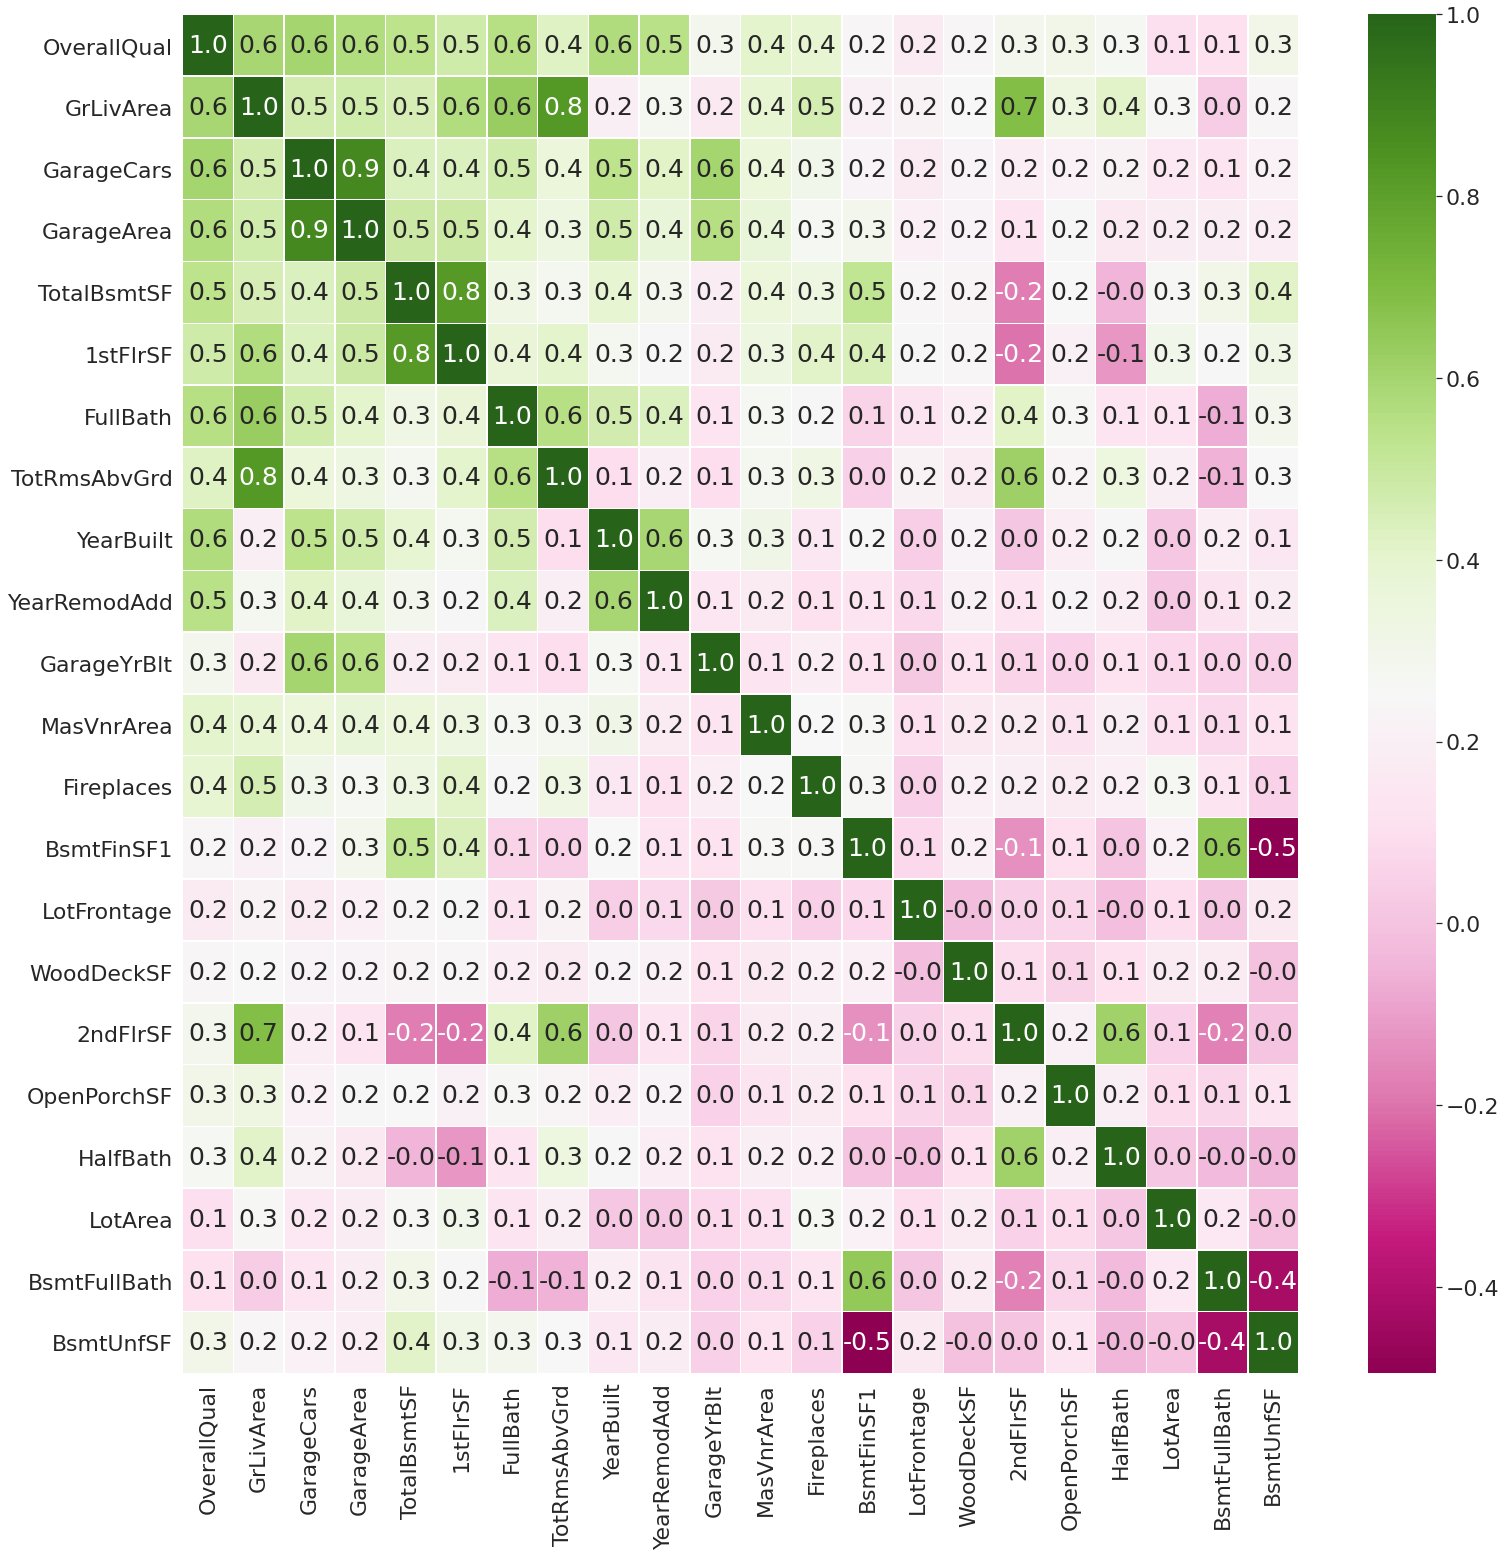

In [12]:
corr_train = train_dataset.corr()
sns.set(font_scale=2)
plt.figure(figsize = (25,25))
ax = sns.heatmap(corr_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [13]:
train_dataset.shape

(1460, 22)

In [14]:
data_test['GarageArea']

Id
1461    730.0
1462    312.0
1463    482.0
1464    470.0
1465    506.0
        ...  
2915      0.0
2916    286.0
2917    576.0
2918      0.0
2919    650.0
Name: GarageArea, Length: 1459, dtype: float64

In [15]:
test_cat_feature_lst =  data_test.dtypes[data_test.dtypes == 'object'].index
test_num_feature_lst =  data_test.dtypes[data_test.dtypes != 'object'].index

data_test_cat = pd.get_dummies(data_test[test_cat_feature_lst])
print(data_test_cat.shape, data_test_cat.columns)
# print(data_test_cat['GarageArea'])
frames_test = [data_test_cat, data_test[test_num_feature_lst]]
data_test = pd.concat(frames_test, axis=1)
print(data_test.shape, data_test.columns)

data_test = round(data_test / data_test.max(), 3)
# data_test = data_test.dropna(axis=1)

data_test = data_test.fillna(0.0001)
data_test = data_test.replace(0, 0.0001)
# data_test['GarageArea']

(1459, 234) Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',
       'LotShape_IR1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)
(1459, 270) Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',
       'LotShape_IR1',
       ...
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object', length=270)


In [16]:
data_test['GarageArea']

Id
1461    0.4910
1462    0.2100
1463    0.3240
1464    0.3160
1465    0.3400
         ...  
2915    0.0001
2916    0.1920
2917    0.3870
2918    0.0001
2919    0.4370
Name: GarageArea, Length: 1459, dtype: float64

In [17]:
test_dataset = pd.DataFrame(data_test, columns=a)
# test_dataset = test_dataset.dropna(axis=1)
test_dataset.tail()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF
Id,,,,,,,,,,,,,,,,,,,,,,
2915,0.4,0.214,0.0001,0.0001,0.107,0.107,0.25,0.333,0.980,0.980,0.0001,0.0001,0.0001,0.0001,0.105,0.0001,0.2930,0.0001,0.5000,0.034,0.0001,0.2550
2916,0.4,0.214,0.2000,0.1920,0.107,0.107,0.25,0.400,0.980,0.980,0.8930,0.0001,0.0001,0.0630,0.105,0.0001,0.2930,0.0320,0.5000,0.033,0.0001,0.1370
2917,0.5,0.240,0.4000,0.3870,0.240,0.240,0.25,0.467,0.975,0.993,0.8880,0.0001,0.2500,0.3050,0.800,0.3330,0.0001,0.0001,0.0001,0.353,0.3330,0.0001
2918,0.5,0.190,0.0001,0.0001,0.179,0.190,0.25,0.400,0.991,0.991,0.0001,0.0001,0.0001,0.0840,0.310,0.0560,0.0001,0.0430,0.0001,0.184,0.0001,0.2690
2919,0.7,0.393,0.6000,0.4370,0.195,0.195,0.50,0.600,0.992,0.992,0.9030,0.0730,0.2500,0.1890,0.370,0.1330,0.5390,0.0650,0.5000,0.170,0.0001,0.1110


In [18]:
test_dataset.shape

(1459, 22)

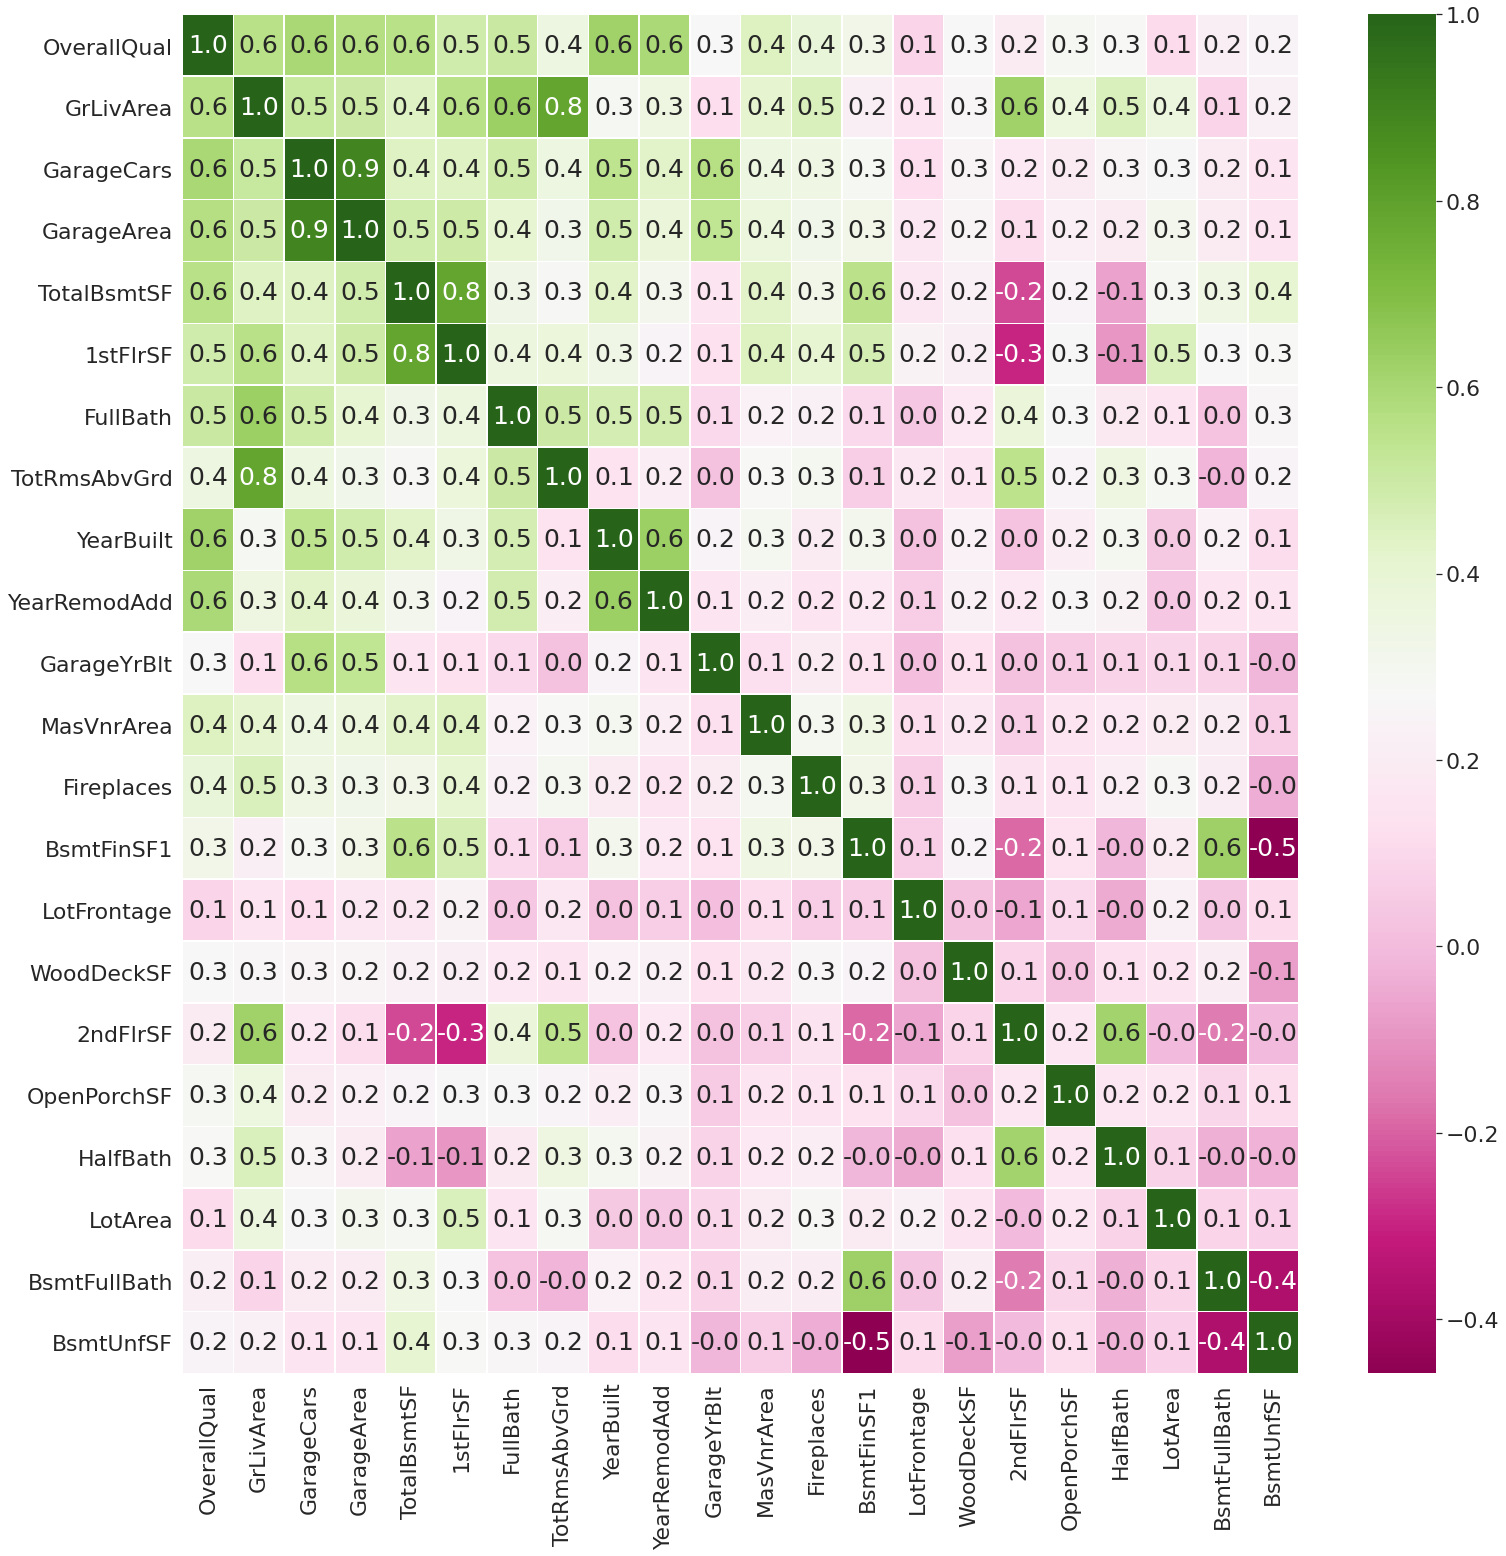

In [19]:
corr_test = test_dataset.corr()
sns.set(font_scale=2)
plt.figure(figsize = (25,25))
ax = sns.heatmap(corr_test, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [20]:
all_data_na = (train_dataset.isnull().sum() / len(train_dataset)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [21]:
all_data_na = (test_dataset.isnull().sum() / len(test_dataset)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [22]:
train_dataset.shape, test_dataset.shape

((1460, 22), (1459, 22))

In [23]:
all_data_na = (train_dataset.isna().sum() / len(train_dataset)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na != 'NaN'].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Missing Ratio


In [24]:
all_data_na = (test_dataset.isna().sum() / len(test_dataset)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na != 'NaN'].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Missing Ratio


In [25]:
test_dataset['SalePrice'] = 0

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset, y_train, test_size=0.33, random_state=42)

In [ ]:
# y_test = test_dataset.SalePrice
# X_test = test_dataset.drop(['SalePrice'], axis=1)

In [57]:
X_test.shape, y_test.shape

((482, 22), (482,))

In [27]:
# X_train = train_dataset

In [58]:
X_train.shape, y_train.shape

((978, 22), (978,))

In [59]:
#skewness and kurtosis
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: 1.535489
Kurtosis: 3.780519


In [78]:
#encoding label
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(y_train)


clf = DecisionTreeClassifier()
parametrs = {'criterion' : ['gini','entropy'], 'max_depth' : (1,10), 'min_samples_split' : range(2,10), 'min_samples_leaf' : range(1,10)}
search = GridSearchCV(clf, parametrs, cv=5)
search.fit(X_train, y_train)
best_tree = search.best_estimator_
best_tree.fit(X_train, y_train)
y_pred_dtc = best_tree.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [80]:
y_pred_dtc.shape

(482,)

In [81]:
best_tree.score(X_train, y_train)

0.2965235173824131

In [82]:
best_tree.score(X_test, y_pred_dtc)


1.0

In [64]:
np.random.seed(0)
clf = RandomForestClassifier(random_state=0)
# создадим словарь параметров из clf (см. выше параметры, которые есть в clf) для поиска оптимального решения:
parametrs = {'n_estimators' : range(10,50, 10), 
             'criterion' : ['entropy'], 
             'max_depth' : range(1, 14, 2), 
             'min_samples_leaf' : range(1, 10), 
             'min_samples_split' : range(2, 12, 2)}
# n_estimators: от 10 до 50 с шагом 10
# max_depth: от 1 до 12 с шагом 2
# min_samples_leaf: от 1 до 7
# min_samples_split: от 2 до 9 с шагом 2
gscv_clf = GridSearchCV(clf, parametrs, n_jobs=-1, cv=3)
gscv_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [65]:
best_clf = gscv_clf.best_estimator_
best_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [66]:
best_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [83]:
y_pred_rf = best_clf.predict(X_test)
y_pred_rf = pd.DataFrame(y_test, columns={'SalePrice':1})

In [96]:
y_test_out = pd.DataFrame()
y_test_out['SalePrice'] = 0
X_test_out = test_dataset.drop(['SalePrice'], axis=1)

In [97]:
y_pred_rf_out = best_clf.predict(X_test_out)

In [109]:
y_pred_rf_out.shape

(1459,)

In [145]:
test_ID = pd.read_csv('test.csv')
sample_sub = pd.DataFrame(test_ID['Id'])
sample_sub['SalePrice'] = y_pred_rf_out
sample_sub.to_csv('Predict_HousePrice_rf.csv', index=False)

In [148]:
sample_sub

,Id,SalePrice
0,1461,110000
1,1462,139000
2,1463,140000
3,1464,140000
4,1465,152000
...,...,...
1454,2915,135000
1455,2916,88000
1456,2917,140000
1457,2918,125000


In [151]:
best_clf.fit(X_test_out, y_pred_rf_out)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [152]:
best_clf.score(X_test_out, y_pred_rf_out)


0.7820424948594928

In [153]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.009199372056514913

In [154]:
cross_val_score(best_clf, X_test_out, y_pred_rf_out, cv=5).mean()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.6010968318975662